In [97]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [98]:
path = 'data/nasa.csv'
data = pd.read_csv(path)
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127,0.284,127.220,284.472,0.079,0.177,417.388,...,314.374,609.600,0.808,57.257,2.006,2458161.642,264.838,0.591,J2000,True
1,3723955,3723955,21.300,0.146,0.327,146.068,326.618,0.091,0.203,479.226,...,136.717,425.869,0.718,313.092,1.497,2457794.969,173.741,0.845,J2000,False
2,2446862,2446862,20.300,0.232,0.518,231.502,517.654,0.144,0.322,759.521,...,259.476,643.580,0.951,248.415,1.967,2458120.468,292.894,0.559,J2000,True
3,3092506,3092506,27.400,0.009,0.020,8.801,19.681,0.005,0.012,28.876,...,57.173,514.082,0.984,18.708,1.528,2457902.337,68.741,0.700,J2000,False
4,3514799,3514799,21.600,0.127,0.284,127.220,284.472,0.079,0.177,417.388,...,84.629,495.598,0.968,158.264,1.484,2457814.455,135.142,0.726,J2000,True


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [100]:
data.isna().any()

Neo Reference ID                False
Name                            False
Absolute Magnitude              False
Est Dia in KM(min)              False
Est Dia in KM(max)              False
Est Dia in M(min)               False
Est Dia in M(max)               False
Est Dia in Miles(min)           False
Est Dia in Miles(max)           False
Est Dia in Feet(min)            False
Est Dia in Feet(max)            False
Close Approach Date             False
Epoch Date Close Approach       False
Relative Velocity km per sec    False
Relative Velocity km per hr     False
Miles per hour                  False
Miss Dist.(Astronomical)        False
Miss Dist.(lunar)               False
Miss Dist.(kilometers)          False
Miss Dist.(miles)               False
Orbiting Body                   False
Orbit ID                        False
Orbit Determination Date        False
Orbit Uncertainity              False
Minimum Orbit Intersection      False
Jupiter Tisserand Invariant     False
Epoch Oscula

In [101]:
# plt.figure(figsize=(40,40))
# sb.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f')
# plt.show()

In [102]:
data = data.drop(['Neo Reference ID', 'Name', 
                  'Orbit ID', 'Orbit Determination Date',
                    'Close Approach Date',
                    'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
                    'Relative Velocity km per hr', 'Miles per hour', 
                    'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
                    'Equinox', # all J2000 
                    'Orbiting Body',# all Earth
                    'Orbital Period', # T² = const * a³, so it has corr = 1 with Semi Major Axis (a)
                    'Est Dia in KM(max)', # High correlation with Est Dia in KM(min)
                    'Jupiter Tisserand Invariant', # High correlation with Mean Motion
                    'Epoch Osculation', # High correlation with Perihelion Time
                    'Aphelion Dist', # High correlation with Semi Major Axis
                    ] 
                , axis = 1)

# tmp = ['Absolute Magnitude', 'Est Dia in M(max)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Perihelion Time', 'Mean Anomaly', 'Hazardous']
# data = data[tmp]

print(data.columns.to_list())

# essa linha faz se em baixo
# data['Hazardous'] = data['Hazardous'].astype(int)


data.head()

['Absolute Magnitude', 'Est Dia in KM(min)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']


,Absolute Magnitude,Est Dia in KM(min),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127,788947200000,6.116,62753692.000,5,0.025,0.426,1.407,6.026,314.374,0.808,57.257,2458161.642,264.838,0.591,True
1,21.300,0.146,788947200000,18.114,57298148.000,3,0.187,0.352,1.108,28.413,136.717,0.718,313.092,2457794.969,173.741,0.845,False
2,20.300,0.232,789552000000,7.591,7622911.500,0,0.043,0.348,1.459,4.238,259.476,0.951,248.415,2458120.468,292.894,0.559,True
3,27.400,0.009,790156800000,11.174,42683616.000,6,0.006,0.217,1.256,7.906,57.173,0.984,18.708,2457902.337,68.741,0.700,False
4,21.600,0.127,790156800000,9.841,61010824.000,1,0.035,0.210,1.226,16.793,84.629,0.968,158.264,2457814.455,135.142,0.726,True


In [103]:
# plt.figure(figsize=(40,40))
# sb.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f')
# plt.show()

## Dropping outliers

In [104]:
# plt.figure(figsize=(40, 40))
# sb.pairplot(data.dropna(), hue='Hazardous')
# plt.show()

In [105]:
# df_no_outliers = data[(data['Orbital Period'] <= 3000) & 
#                    (data['Est Dia in M(max)'] <= 10000) & 
#                    (data['Semi Major Axis'] <= 4) & 
#                    (data['Perihelion Time'] > 2.45) & 
#                    (data['Inclination'] < 70)]
df_no_outliers = data[(data['Est Dia in KM(min)'] <= 10) & 
                   (data['Semi Major Axis'] <= 4) &
                   (data['Inclination'] < 70)]
df_no_outliers.reset_index(inplace=True, drop=True)
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4683 non-null   float64
 1   Est Dia in KM(min)            4683 non-null   float64
 2   Epoch Date Close Approach     4683 non-null   int64  
 3   Relative Velocity km per sec  4683 non-null   float64
 4   Miss Dist.(kilometers)        4683 non-null   float64
 5   Orbit Uncertainity            4683 non-null   int64  
 6   Minimum Orbit Intersection    4683 non-null   float64
 7   Eccentricity                  4683 non-null   float64
 8   Semi Major Axis               4683 non-null   float64
 9   Inclination                   4683 non-null   float64
 10  Asc Node Longitude            4683 non-null   float64
 11  Perihelion Distance           4683 non-null   float64
 12  Perihelion Arg                4683 non-null   float64
 13  Per

In [106]:
# plt.figure(figsize=(40, 40))
# sb.pairplot(df_no_outliers.dropna(), hue='Hazardous')
# plt.show()

In [107]:
df_no_outliers.info()
df_no_outliers.to_csv('data/nasa_clean.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4683 non-null   float64
 1   Est Dia in KM(min)            4683 non-null   float64
 2   Epoch Date Close Approach     4683 non-null   int64  
 3   Relative Velocity km per sec  4683 non-null   float64
 4   Miss Dist.(kilometers)        4683 non-null   float64
 5   Orbit Uncertainity            4683 non-null   int64  
 6   Minimum Orbit Intersection    4683 non-null   float64
 7   Eccentricity                  4683 non-null   float64
 8   Semi Major Axis               4683 non-null   float64
 9   Inclination                   4683 non-null   float64
 10  Asc Node Longitude            4683 non-null   float64
 11  Perihelion Distance           4683 non-null   float64
 12  Perihelion Arg                4683 non-null   float64
 13  Per

## Models training

In [108]:
# So para experimentar
# TODO
num_features = df_no_outliers.columns.to_list()
num_features.remove('Orbit Uncertainity')
num_features.remove('Hazardous')

num_features = list(set(num_features) - set(['Est Dia in M(min)', 'Orbit ID', 'Jupiter Tisserand Invariant', 'Aphelion Dist', 'Epoch Osculation', 'Mean Motion']))
cat_features = ['Orbit Uncertainity']

num_features.append('Orbit Uncertainity')

df_no_outliers['Hazardous'] = df_no_outliers['Hazardous'].astype(int)
# df_no_outliers['Orbit Uncertainity'] = df_no_outliers['Orbit Uncertainity'].astype(int)

x = df_no_outliers.drop(['Hazardous'], axis=1)
y = df_no_outliers['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

print((x.columns.to_list()))

['Absolute Magnitude', 'Est Dia in KM(min)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']


C:\Users\musta\AppData\Local\Temp\ipykernel_21260\2993821091.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Hazardous'] = df_no_outliers['Hazardous'].astype(int)


In [109]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine transformers for specific columns
preprocessor = ColumnTransformer([
    ("num", numerical_transformer, num_features),
    # ("cat", categorical_transformer, cat_features)
])

# Fit transformers on training data only
preprocessor.fit(X_train)

# Transform train and test data using fitted transformers
x_train_transformed = preprocessor.transform(X_train)
x_test_transformed = preprocessor.transform(X_test)

x_train_transformed.shape

(3746, 15)

In [110]:
def model_evaluation(x, y, models):
        
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    
    # Create a dataframe to store the different metric values for each algorithm
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD', 'Pre Mean', 'Pre STD', 
                                       'Rec Mean', 'Rec STD', 'F1 Mean', 'F1 STD'])
    results_acc = []
    results_pre = []
    results_rec = []
    results_f1 = []
    confusion_matrices = []

    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
        y_pred = cross_val_predict(model, x, y, cv=kfold)
        cm = confusion_matrix(y, y_pred)
        confusion_matrices.append(cm)
        
        # Create the row of the results
        df_result_row = {'Algorithm': name, 
                         'Acc Mean': result['test_accuracy'].mean(), 
                         'Acc STD': result['test_accuracy'].std(), 
                         'Pre Mean': result['test_precision'].mean(), 
                         'Pre STD': result['test_precision'].std(), 
                         'Rec Mean': result['test_recall'].mean(), 
                         'Rec STD': result['test_recall'].std(), 
                         'F1 Mean': result['test_f1'].mean(), 
                         'F1 STD': result['test_f1'].std()}
        # Add the row to the results data frame
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        
        results_acc.append(result['test_accuracy'])
        results_pre.append(result['test_precision'])
        results_rec.append(result['test_recall'])
        results_f1.append(result['test_f1'])

        # save model.
        current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        dump(model, f'models/{name}_{current_time}_.joblib')

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # TODO add for each algorithm confusion metrix.
    plot_objects = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    fig, (ax1, ax2, ax3, ax4) = plot_objects
    
    ax1.boxplot(results_acc)
    ax1.set_title('Accuracy', fontsize=14)
    ax1.set_xticklabels(names, rotation=30)
    ax2.boxplot(results_pre)
    ax2.set_title('Precision', fontsize=14)
    ax2.set_xticklabels(names, rotation=30)
    ax3.boxplot(results_rec)
    ax3.set_title('Recall', fontsize=14)
    ax3.set_xticklabels(names, rotation=30)
    ax4.boxplot(results_f1)
    ax4.set_title('F1-Score', fontsize=14)
    ax4.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()


    fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 4))
    if len(models) == 1:
        axes = [axes]
    for ax, cm, name in zip(axes, confusion_matrices, names):
        sb.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", ax=ax, cmap='Blues')
        ax.set_title(f'{name} Confusion Matrix')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
    plt.tight_layout()
    plt.show()

C:\Users\musta\AppData\Local\Temp\ipykernel_21260\843182356.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.951    0.009     0.872    0.029     0.816    0.057    0.842   
DTC           0.995    0.004     0.982    0.017     0.987    0.016    0.984   
KNN           0.897    0.013     0.732    0.055     0.571    0.058    0.640   
GNB           0.953    0.012     0.855    0.047     0.852    0.046    0.853   
XGB           0.996    0.002     0.989    0.010     0.988    0.013    0.988   

           F1 STD  
Algorithm          
SVC         0.031  
DTC         0.013  
KNN         0.049  
GNB         0.038  
XGB         0.007  


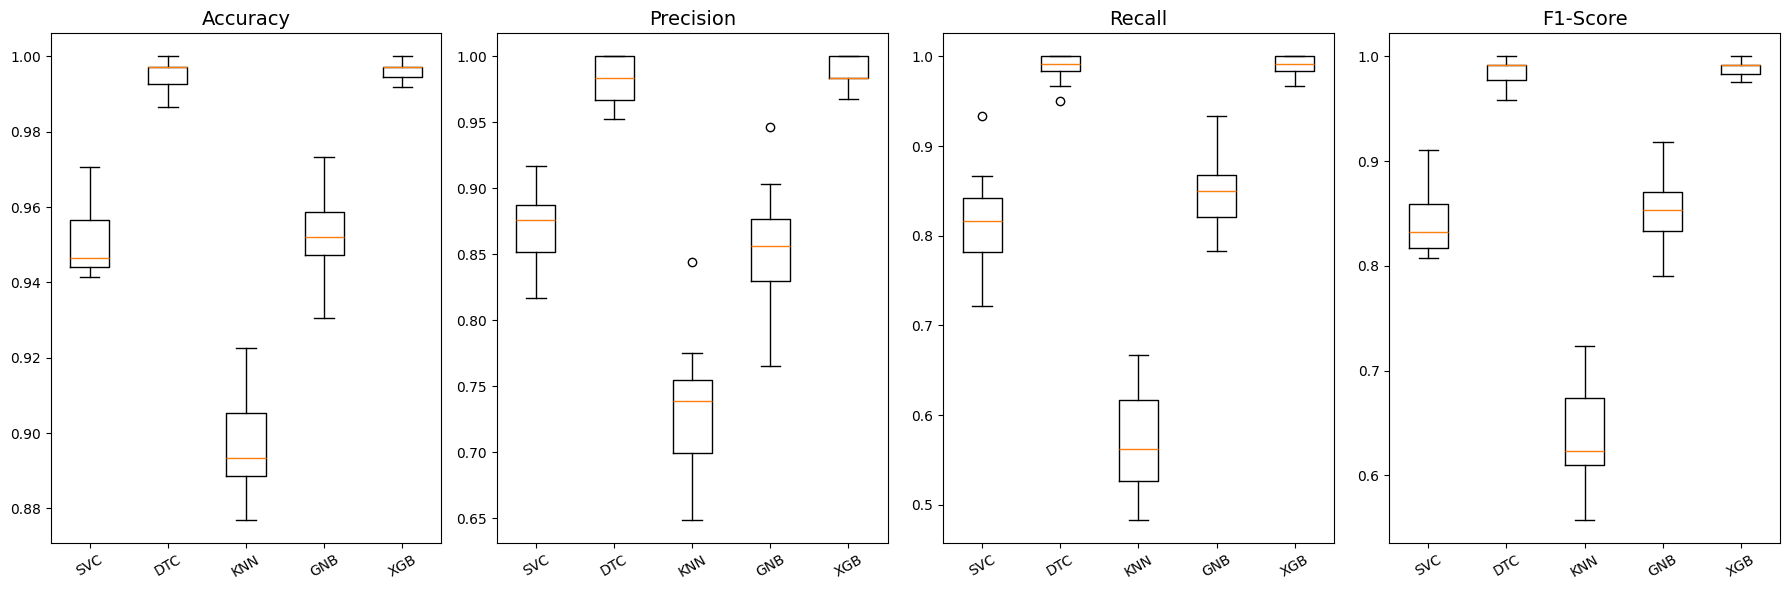

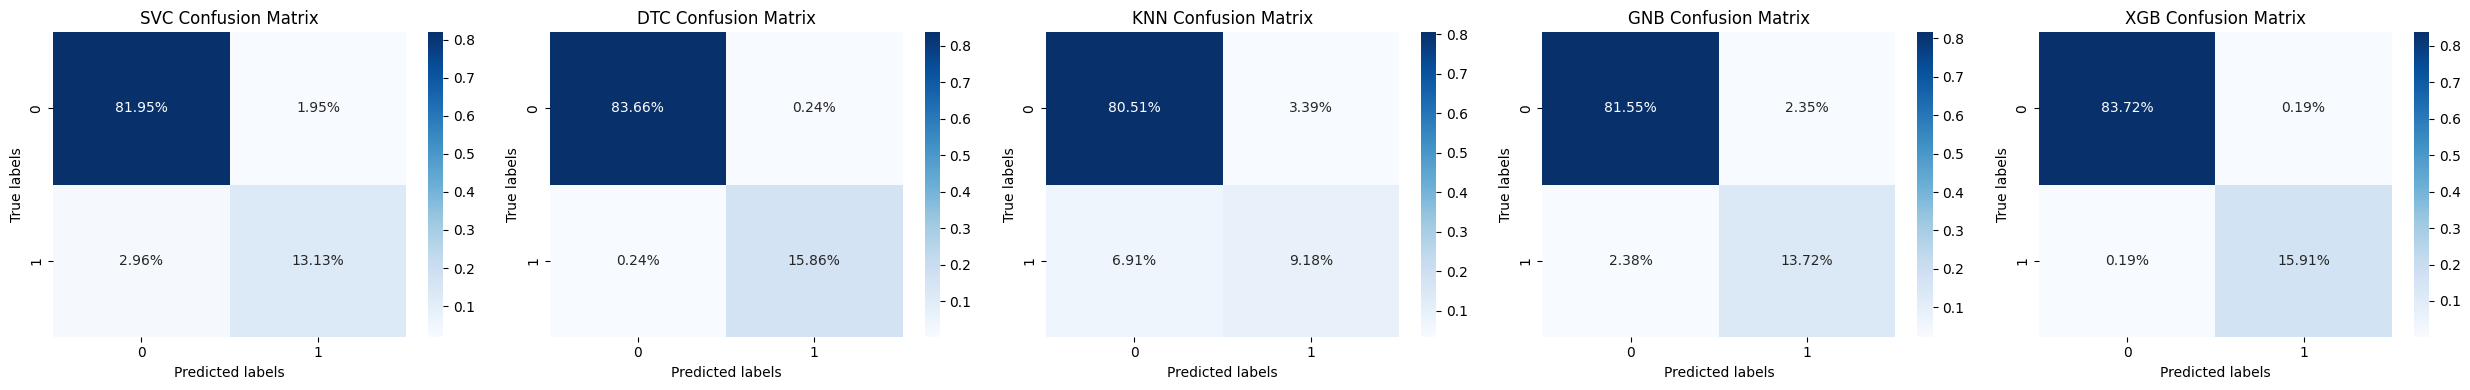

In [111]:
nl_models = []
nl_models.append(('SVC', SVC()))
nl_models.append(('DTC', DecisionTreeClassifier()))
nl_models.append(('KNN', KNeighborsClassifier()))
nl_models.append(('GNB', GaussianNB()))
nl_models.append(('XGB', XGBClassifier()))

model_evaluation(x_train_transformed, y_train, nl_models)

C:\Users\musta\AppData\Local\Temp\ipykernel_21260\843182356.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
RFC           0.997    0.002     0.989    0.013     0.990    0.013    0.989   
ABC           0.994    0.002     0.987    0.012     0.978    0.013    0.983   
GBC           0.995    0.003     0.988    0.010     0.982    0.017    0.985   

           F1 STD  
Algorithm          
RFC         0.006  
ABC         0.007  
GBC         0.010  


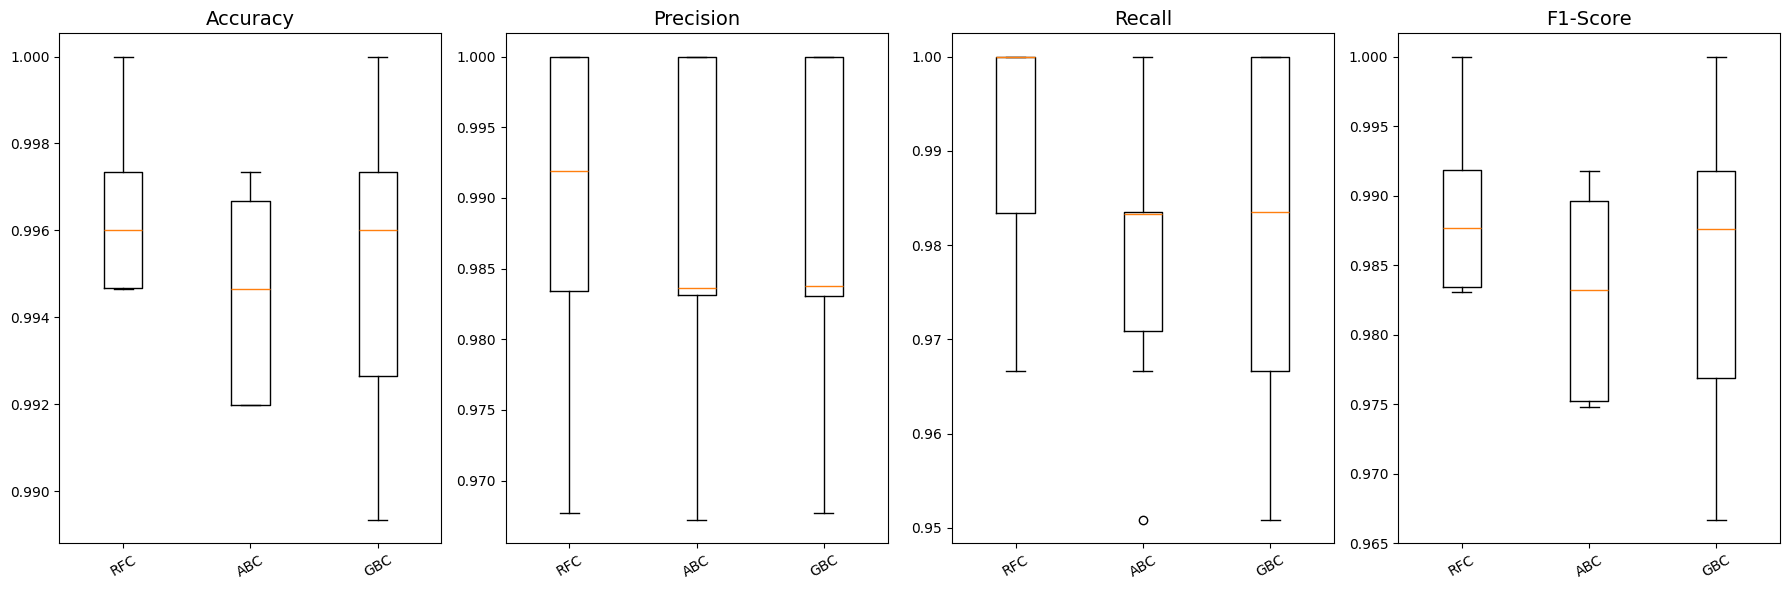

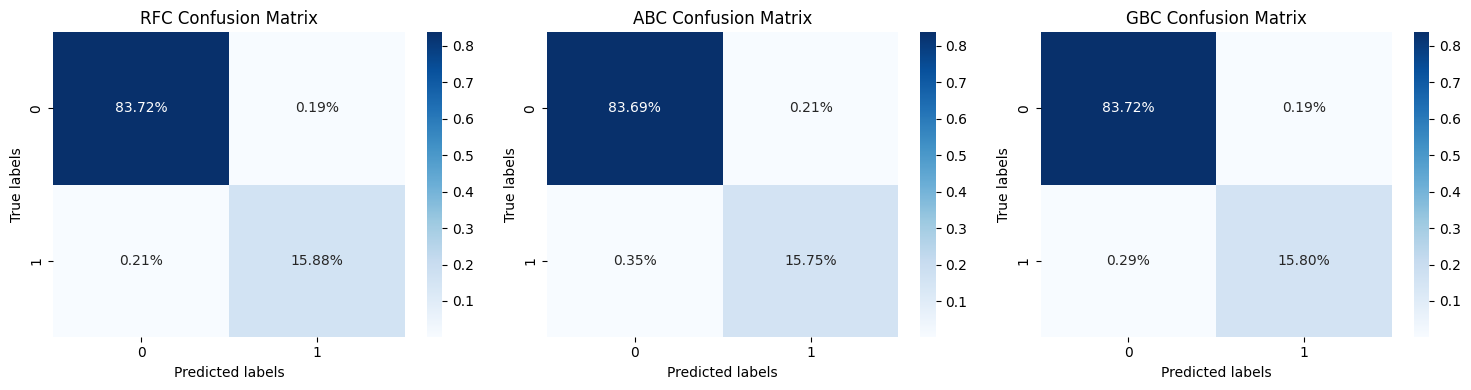

In [112]:
ens_models = []
ens_models.append(('RFC', RandomForestClassifier()))
ens_models.append(('ABC', AdaBoostClassifier(algorithm='SAMME')))
ens_models.append(('GBC', GradientBoostingClassifier()))

model_evaluation(x_train_transformed, y_train, ens_models)